# Линейная регрессия

# Группа: РИ-461223. Студенты: Журавлев Д. Д., Андреев А.М.

Задача прогноза вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной ошибки. Рассмотрим линейную регресси на примере листка ириса. Будем предсказывать длину листка по его ширине. x - ширина листа, y - длина листка.

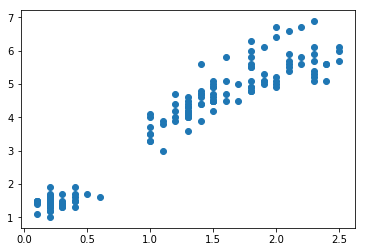

In [18]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = load_iris().data
x = data[:,3]
y = data[:,2]
plt.scatter(x, y)
#plt.plot(np.array([0.1,2.5]), np.array([1,6.9]), 'g')
#plt.show()

Напишите функцию, которая по двум параметрам  $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости длины листа $y$ от ширины листа $x$ прямой линией $y = w_0 + w_1 * x$:

$$E(w_0, w_1) = \frac{1}{n}\sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – длина и ширина листа ириса для $i$-ого объекта в наборе данных.

In [19]:
def square_error(w0, w1):
    n=len(data)
    Error=0
    for i in range(n):
        Error=((y[i]-(w0+w1*x[i]))**2)+Error
    E=(1/n)*Error
    return E
square_error(2,3)

3.9485333333333332

Возьмите параметры $\omega_0$ - свободный член и $\omega_1$ - наклон прямой и постройте две любые прямые, которые быдут некоторым образом описывать зависмость ширины листа от его длины. Представьте графически.

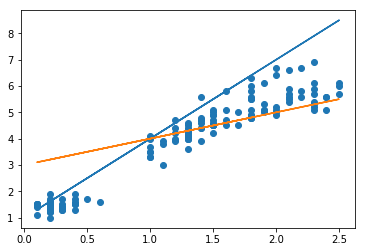

In [20]:
lineFunc = lambda x, w0, w1: w0 + w1 * x

plt.scatter(x, y)

y1=lambda x: x*3+1
y2=lambda x: x*1+3

plt.plot(x,y1(x))
plt.plot(x,y2(x))

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Рассмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 0.

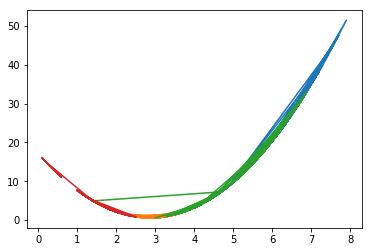

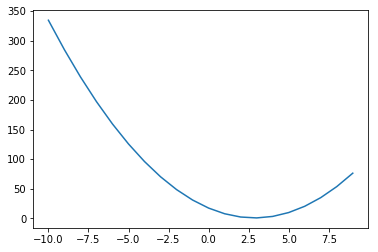

In [21]:
# code here
plt.plot(data[:,],square_error(0,data[:,]))
plt.show()
#data
w11=range(-10,10)
plt.plot(w11,square_error(0,w11))

С помощью метода minimize_scalar из scipy.optimize найдите минимум функции, определенной выше, для значений параметра  $w_1$ в диапазоне [-10,10]. Проведите на графике прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в оптимальное значение параметра $w_1$.

In [22]:
from scipy.optimize import minimize_scalar
Torch=minimize_scalar(lambda w11: square_error(50,w11), bounds=(-10,10), method='bounded')
Torch

     fun: 1260.0831182671075
 message: 'Solution found.'
    nfev: 31
  status: 0
 success: True
       x: -9.99999335625205

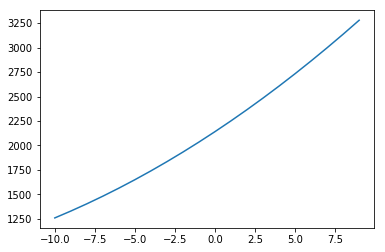

In [23]:
# График функции square_error при (w0,w1)=(50,range(-10,10))
plt.plot(w11,square_error(50,w11))

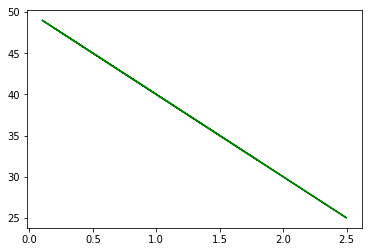

In [24]:
# График прямой (w0,w1)=(50,w1_opt=Torch.x)
plt.plot(x,lineFunc(x,50,Torch.x), c='g')

В связи с тем, что у нас требуется найти минимальное значение функции по $w_0$, $w_1$ следовательно функция ошибки будет находиться в трехмерном пространстве.
Пример построения трехмерных графиков находится ниже.

In [25]:
from mpl_toolkits.mplot3d import Axes3D

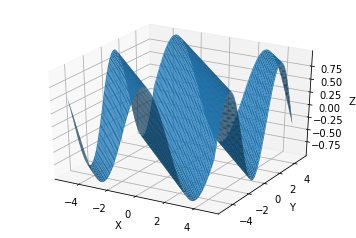

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X + Y)


surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Постройте график зависимости функции ошибки в трехмерном пространстве от параметров $\omega_0$ и $\omega_1$.

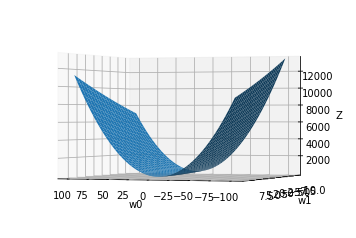

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

w0 = np.arange(-100, 100, 1)
w1 = np.arange(-10, 10, 1)
w0, w1 = np.meshgrid(w0, w1)
Z = square_error(w0, w1)

ax.view_init(0,110)
surf = ax.plot_surface(w0, w1, Z)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Z')
plt.show()

Используя метод minimize найдите минимум функции. Диапазон поиска подберите самостоятельно. Начальная точка - (0,0). Постройте прямую на графике с данными.

2.3 1.0


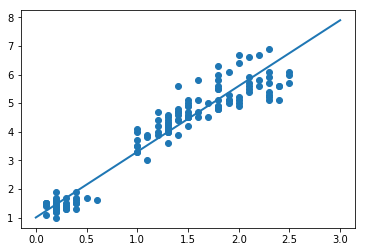

In [28]:
#Т.к. minimize принимает функцию от одного аргумента, перепишем нашу функцию square_error под каскадный аргумент,
#который будет включать в себя w0 и w1
from scipy.optimize import minimize
from scipy.optimize import Bounds
def kascad_square_error(kascad):
    n=len(data)
    Error=0
    for i in range(n):
        Error=((y[i]-(kascad[0]+kascad[1]*x[i]))**2)+Error
    E=(1/n)*Error
    return E
plt.scatter(x,y)
#minimize(kascad_square_error, x0=(0,0), bounds=Bounds(1,2.3), method='L-BFGS-B')
minim_w1, minim_w0 = minimize(kascad_square_error, x0=(0.0,0.0), method='L-BFGS-B', bounds=([2.0, 2.3],[0,1]))['x']
x1=np.linspace(0,3)
y1=minim_w0 + minim_w1 * x1
plt.plot(x1, y1, linewidth=2.0)
#print('Optimal ( w0, w1 ) value: ( 1.091 , 2.226 )')
print(minim_w1,minim_w0)

Проверьте полученные результаты аналитическим методом поиска корней СЛАУ использованным на лекции.

In [29]:
# Проверка с помощью метода нименьших квадратов
Check_array_miniSquare = np.vstack([x, np.ones(len(x))]).T
W1, W0 = np.linalg.lstsq(Check_array_miniSquare, y)[0]
print(W0,W1)

1.0905721458773792 2.225885306553912


C:\Users\jurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


## Градиентный спуск

Найдите решение для данных ниже методом градиентного спуска:
- инициализируйте случайные веса для прямой;
- задайте шаг обучения;
- изменяйте веса в сторону антиградиента.

Проиллюстрируйте все шаги на графике до момента схождения к решению.

Text(0.5,1,'Initial data')

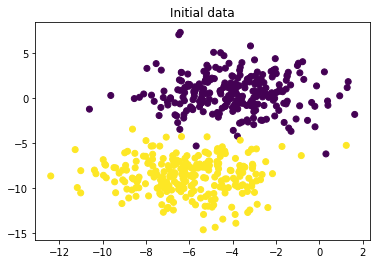

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 500, n_features=2, centers=2, cluster_std = 2, random_state=17)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

0.886796521761229 0.4171268394781704


Text(0.5,0,'x')

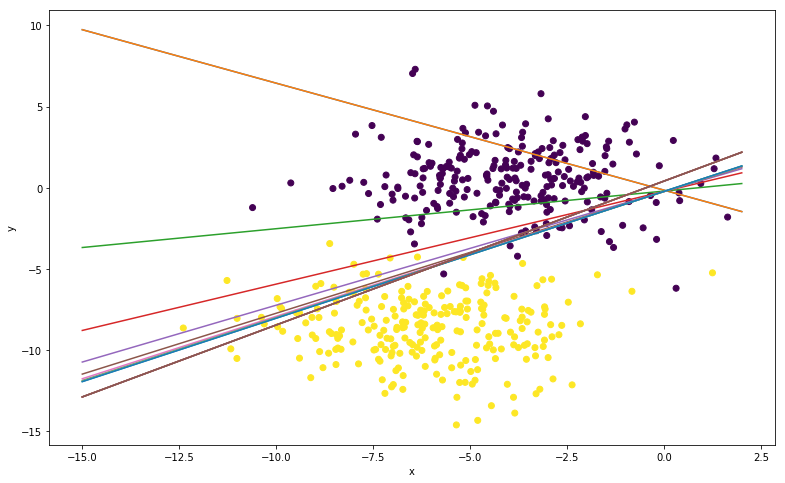

In [31]:
step=0.01
l=len(X[:,1])
w000=0
w111=-3
x = np.linspace(-15,2)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0],X[:,1],c=Y)
for i in range(10000):
    w111 -= step*2/l*sum((w111*X[:,0]+w000-X[:,1])*X[:,0])
    w000 -= step*2/l*sum(w111*X[:,0]+w000-X[:,1])
    if (i < 10):
        y = w000+w111*x
        plt.plot(x, y)
    if (i % 2000 == 0):
        y = w000+w111*x
        plt.plot(x, y)
    #solutionOFmin = lambda x: w000 + w111 * x;
 #   plt.plot(x,solutionOFmin(x))
#    print(w0,w1)

y = w000+w111*x
plt.plot(x, y)
print(w111,w000)
#k=[w111*x+w000 for x in xline]
plt.ylabel('y')
plt.xlabel('x')



#solutionOFmin_Twist = np.array([[i, solutionOFmin(i)] for i in range(0, 4)])
#plt.plot(solutionOFmin_Twist[:,0], solutionOFmin_Twist[:,1], linewidth=2.0)
#plt.plot(xLine,yLine,k)


In [32]:
# Проверка результаты градиентного спуска с помощью фукнции fit
import numpy as np
from sklearn.linear_model import LinearRegression
X, Y = make_blobs(n_samples = 500, n_features=2, centers=2, cluster_std = 2, random_state=17)
X1 = X[:,0].reshape((-1, 1))
X2 = X[:,1]

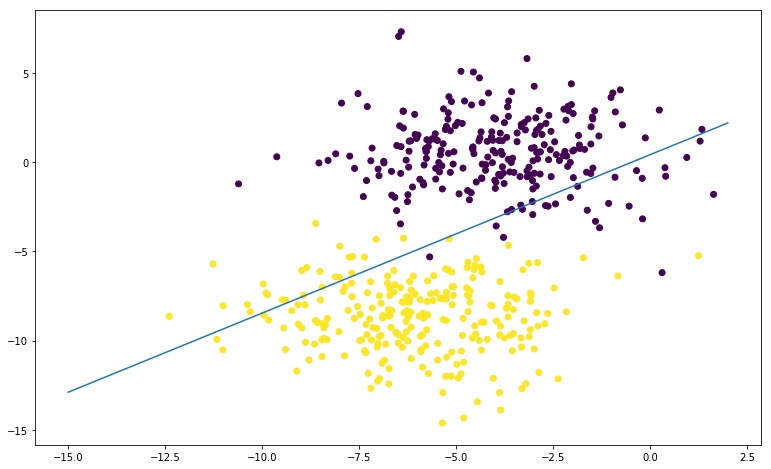

In [33]:
#x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
#y = np.array([5, 20, 14, 32, 22, 38])
for i in range(100):
    model = LinearRegression().fit(X1, X2)
#plt.scatter(X[:,0],X[:,1])
plt.figure(figsize=(13,8))
x = np.linspace(-15,2)
y = model.predict(x.reshape((-1, 1)))
plt.plot(x, y)
plt.scatter(X[:,0],X[:,1],c=Y)